# Wiskundige technieken les 2

Notebook bij les 2 van de leerlijn wiskundige technieken van S3 - AI. 

© Auteur: Rianne van Os

In deze les leer je rekenregels voor het bepalen van de afgeleide van samengestelde functie. Ook gaan we de afgeleide gebruiken om het minimum van een grafiek te vinden en je gaat je eerste simpele gradient descent algoritme implementeren. 

**Voorbereiding voor de les:**
- Theorie en opdrachten t/m opdracht 2.2


In [38]:
#importeer benodigde libraries
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

## Product-, quotiënt- en kettingregel
We breiden de rekenregels uit de vorige les uit met de productregel, de quotientregel en de kettingregel. 
Lees daarvoor: 
https://set.kuleuven.be/voorkennis/blik-op-wiskunde/handboekB/afgeleiden/afgeleiden_productregel (lees t/m oefening 1)
https://set.kuleuven.be/voorkennis/blik-op-wiskunde/handboekB/afgeleiden/afgeleiden_kettingregel (lees t/m oefening 1)


**Merk op:** de quotiëntregel is wel belangrijk voor de volledigheid, maar deze hebben we niet nodig bij het toepassen van gradient descent op de lossfuncties die wij behandelen. De kettingregel zul je wel tegenkomen, zorg dat je die goed begrijpt!

### Opdracht 2.1
Maak de volgende opdrachten op deze pagina:
https://set.kuleuven.be/voorkennis/blik-op-wiskunde/handboekB/afgeleiden/exercises/afgeleiden_basis

- oefening 2: 1, 2
- oefening 4: 1, 6, 13, 14
- oefening 5: 1, 3, 8
- oefening 6: 1, 6, 7
- oefning 7: 1, 2, 3

## Optimaliseren door afgeleide gelijk te stellen aan 0

Lees deze pagina t/m voorbeeld 3: https://set.kuleuven.be/voorkennis/blik-op-wiskunde/handboekB/afgeleiden/minmaxproblemen

### Opdracht 2.2

Differentieer onderstaande functies en gebruik de afgeleide om de extrema van de grafieken te vinden. Bepaal telkens of je te maken hebt met een minimum of een maximum, of deze lokaal of globaal is, of dat je te maken hebt met een buigpunt. 

a. $f(a) = a^2 - 4a$

b. $g(x) = x^3 -12 \cdot x$

c. $h(b) =  b^3$

## Optimaliseren met gradient descent

In de les over lineaire regressie hebben we al een toepassing gezien van een functie waarvan je het minimum wilt bepalen. Namelijk de functie die de *root mean squared error* berekent. Hoe kleiner die *root mean squared error* is, hoe beter de voorspellingen van je model. Deze functie noemen we ookwel de *loss function* of de *cost function* van een model. 

Vaak zijn loss-functies van machine learning algoritmes zo complex dat het onmogelijk, of heel inefficiënt is om het minimum hiervan te bepalen door de afgeleide gelijk te stellen aan 0. Dit komt mede doordat een loss functie van een machine learning algoritme vaak tientallen variabelen heeft en een deeplearning model nog veel meer. (Wij hebben tot nu toe enkel functies gedifferentieerd met maar 1 variabele, later kijken we naar hoe dit met meerdere variabelen moet).

Gelukkig is er een ander algoritme om het minimum van functies te vinden (of in ieder geval die te benaderen), namelijk gradient descent. We gaan nu voor een simpele functie kijken hoe dit werkt, later breiden we dit uit naar een complexere functies.

### Opdracht 2.3
Gegeven is de functie $f(a) = a^2 +4a+3$.

Bepaal met de afgeleide $f'(a)$ waar deze functie een minimum of maximum heeft. Maak ook een plot van $f(a)$.

Afgeleide: $f'(a) = 2a + 4$  
$2a + 4 = 0$  
$2a = -4$  
$a = -2$

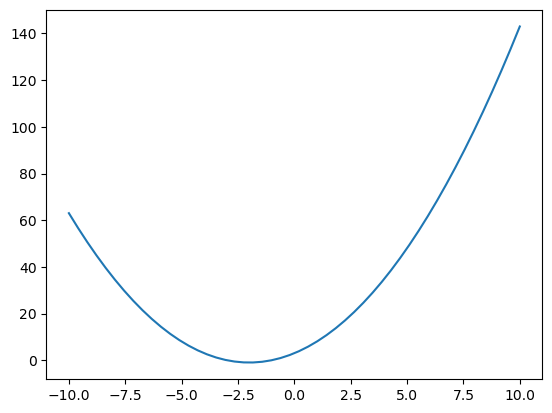

In [39]:
a = np.linspace(-10, 10)

def functie(a):
    return a**2 + 4*a + 3

plt.plot(a, functie(a))

### Het gradient descent algoritme


Nu gaan we ditzelfde minimum bepalen met behulp van *gradient descent*. Wat we doen is het volgende: je kiest een willekeurig beginpunt op de grafiek en bepaalt de helling in dat punt. Is de helling negatief, dan daalt de grafiek, dus dan weet je dat je 'een stap naar rechts' moet zetten om het minimum te vinden. Is de helling positief, dan stijgt de grafiek, dus dan moet je een stap naar links zetten om bij het minimum te komen. Nadat je deze stap gezet hebt, bereken je de helling in het nieuwe punt en bepaal je vanuit daar weer welke kant je op moet om dichter bij het minimum te komen. Dit herhaal je tot je (hopelijk) een minimum gevonden hebt.

(Het kan natuurlijk zijn dat je grafiek geen minimum heeft en dat je oneindig door blijft gaan, maar voor nu gaan we er even vanuit dat dit minimum er wel is.)

Een formelere beschrijving:

1. Kies een willekeurige waarde voor $a$, deze noemen we $a_0$, start met $a_0 = 1$

2. Bereken $f'(a_0)$.

3. Defineer $a_1 = a_0 - 0.1 \cdot f'(a_0)$

Herhaal stap 2 en 3. In stap $i+1$ doe je:

2. Bereken $f'(a_i)$

3. Definieer $a_{i+1} = a_i - 0.1 \cdot f'(a_i)$.

**Merk op**:
- Het getal 0.1 dat we hier gebruiken, noemen we de *learning rate*, deze hoeft in de praktijk geen 0.1 te zijn, maar is een parameter die je kunt tunen.
- In stap 2 bepalen we telkens de helling van de grafiek en die helling gebruiken we in stap 3 om de parameter $a_i$ aan te passen zodat we een stukje opschuiven naar het minimum. Deze helling bepaalt in combinatie met de learning rate hoe groot de stap is die we zetten.
- We hebben nu nog geen stop-criteria gedefinieerd. Dat doen we later.

### Opdracht 2.4
a. Neem opnieuw $f(a) = a^2+4a+3$ en $a_0 = 1$. Bereken handmatig de waarden van $(a_i, f(a_i))$ voor de eerste 4 stappen. Maak een plot van de functie, waarin je de punten $(a_i, f(a_i))$ markeert.

b. Doe hetzelfde nog eens maar dan met $a_0 = -3 $ en  *learning rate* = 1.

a.  
$f(a) = a^2 + 4a + 3$  
$f'(a) = 2a + 4$

$(a_0, f(a_0)) = (1, 8)$  
$(a_1, f(a_1)) = (0.4, 4.76)$  
$(a_2, f(a_2)) = (-0.08, ~2.69)$  
$(a_3, f(a_3)) = (-0.464, ~1.36)$

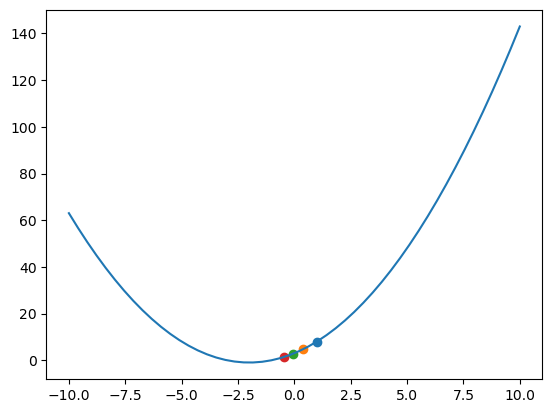

In [40]:
a = np.linspace(-10, 10)

def functie(a):
    return a**2 + 4*a + 3

plt.plot(a, functie(a))
plt.scatter(1, 8)
plt.scatter(0.4, 4.76)
plt.scatter(-0.08, 2.69)
plt.scatter(-0.464, 1.36)
plt.show()

### Opdracht 2.5
a. Schrijf een functie die het gradient descent algoritme implementeert. De parameters van de functie zijn: een afgeleide functie $f'(x)$, een beginwaarde $a_0$, een *learning rate* en het maximale aantal iteraties (*num_steps*).  De functie moet een array met alle waarden voor $a_i$ teruggeven. Stop als de absolute waarde van de gradient kleiner is dan 0.01 of wanneer het maximale aantal stappen bereikt is.

b. Gebruik deze functie om het minimum van $f(x) = x^2 + 4x + 3$ te vinden. Maak een plot die de grafiek van de functie $f(x)$ toont, met daarop de punten $(a_i, f(a_i))$.  Varieer eens met de *learning rate*, de beginwaarde en de stopcriteria. Zoek naar waarden die er voor zorgen dat het algoritme goed werkt, maar zoek ook naar waarden waarvoor het niet werkt. Maak telkens een visualisatie. Kun je een conclusie trekken over geschikte waarden voor deze parameters?

In [41]:
def testfunctie(x):
    return 2*x + 4

def gradient_descent(func, a0=1, learn_rate=0.1, num_steps=1000):
    result = [a0]
    ai = a0
    for _ in range(num_steps):
        if abs(func(ai)) < 0.01:
            break
        ai = ai - learn_rate * func(ai)
        result.append(ai)
    return result

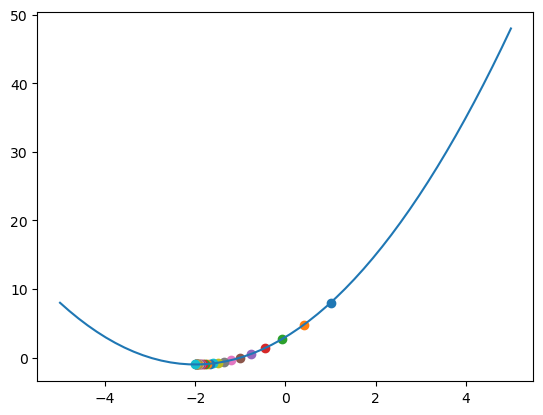

In [42]:
def functie(x):
    return x**2 + 4*x + 3

def afgeleide_functie(x):
    return 2*x + 4

x = np.linspace(-5, 5)
ai = gradient_descent(afgeleide_functie, 1, 0.1, 100)

plt.plot(x, functie(x))
for a in ai:
    plt.scatter(a, functie(a))
plt.show()

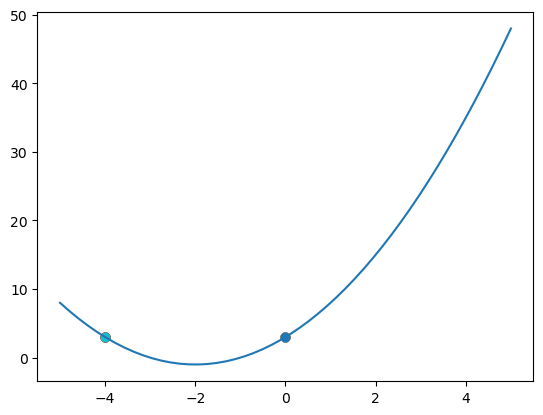

In [43]:
def functie(x):
    return x**2 + 4*x + 3

def afgeleide_functie(x):
    return 2*x + 4

x = np.linspace(-5, 5)
ai = gradient_descent(afgeleide_functie, 0, 1, 100)

plt.plot(x, functie(x))
for a in ai:
    plt.scatter(a, functie(a))
plt.show()

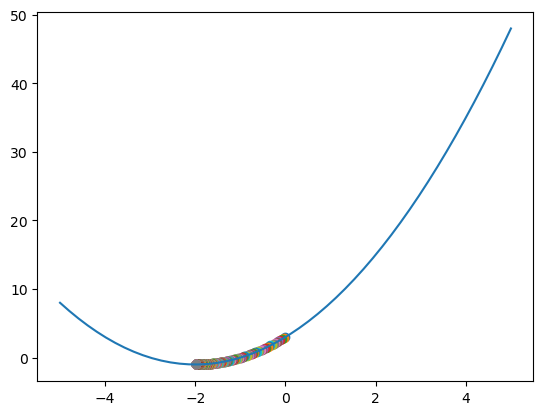

In [44]:
def functie(x):
    return x**2 + 4*x + 3

def afgeleide_functie(x):
    return 2*x + 4

x = np.linspace(-5, 5)
ai = gradient_descent(afgeleide_functie, 0, 0.01, 1000)

plt.plot(x, functie(x))
for a in ai:
    plt.scatter(a, functie(a))
plt.show()

### Het aanpassen van de learning rate
Hopelijk is het je bij het maken van bovenstaande opdrachten opgevallen dat het belangrijk om de learning rate niet te groot, maar ook niet te klein te kiezen. Bij een te grote learning rate kan het zijn dat je te grote stappen zet, waardoor je over het minimum heen springt. Een te kleine learning rate maakt het algoritme erg traag, en kan ervoor zorgen dat je het minumum nog niet gevonden hebt nadat het maximale aantal stappen gezet is. Onderstaande plaatje laat dit goed zien.

![learning rate](../afbeeldingen/WiskundigeTechnieken/learning_rate.png "learning rate")
bron: https://medium.com/octavian-ai/how-to-use-the-learning-rate-finder-in-tensorflow-126210de9489

### Lokaal en globaal minimum

De functie $f(x)$ die we net bekeken, had één globaal minimum, die met gradient descent redelijk makkelijk te vinden is. We bekijken nu een complexere functie:

$$g(x) = {3^x} - {x^3}$$


In onderstaande grafieken is te zien dat er twee minima zijn: een lokaal minimum en een globaal minimum. In de grafieken is niet te zien wat de exacte waarde voor `x` is.

Text(0.5, 1.0, 'Grafiek van de functie $g(x) = 3^x - x^3$')

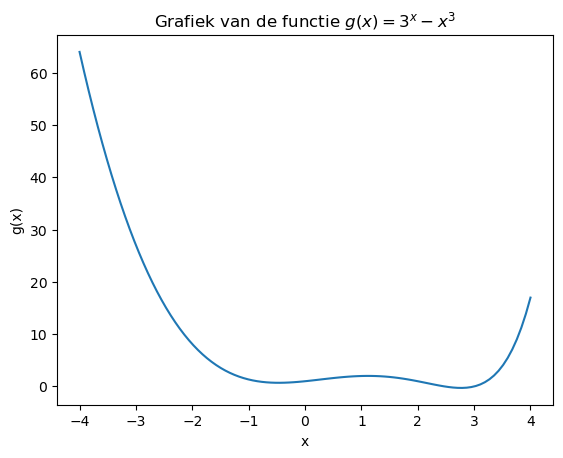

In [45]:
g = lambda x: 3**x - x**3
x = np.linspace(-4, 4, 100)
y = g(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('Grafiek van de functie $g(x) = 3^x - x^3$')

(-2.0, 4.0)

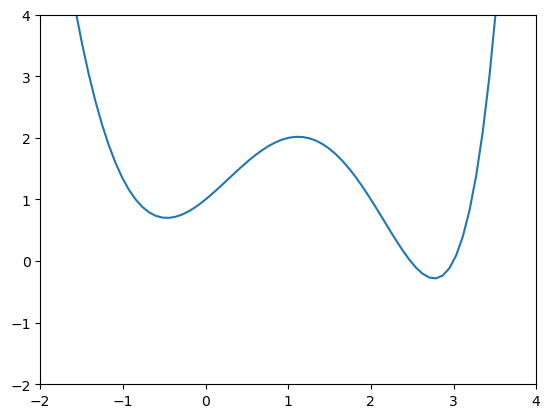

In [46]:
# Hier zoomen we in op de minima:
g = lambda x: 3**x - x**3
x = np.linspace(-4, 4, 100)
y = g(x)
plt.plot(x, y)
plt.xlim(-2, 4)
plt.ylim(-2, 4)

### Opdracht 2.6

Pas het gradient descent algoritme **handmatig** (dus met pen en papier) toe om *een* minimum van $g(x)$ te vinden voor een aantal scenario's:
1. Startpunt $x = 4$ - learning rate = $0.10$
2. Startpunt $x = 4$ - learning rate = $0.05$

Ga als volgt te werk:
- Bepaal de afgeleide van de functie $g(x)$
- Bepaal de gradient voor $x = 4$
- Bepaal met behulp van het startpunt, de gradient en de learning rate het vervolgpunt
- Ga door tot dat de gradient kleiner dan 0.1 is of tot dat je 5 iteraties hebt doorlopen

### Opdracht 2.7

Gebruik je *gradient descent* functie om een minimum te vinden van $g(x)$. Visualiseer steeds het pad (gebruik hiervoor de uitwerkingen van opdracht 2.5). Laat in de plots duidelijk zien dat de keuze van het beginpunt uitmaakt voor welk minimum je vindt.

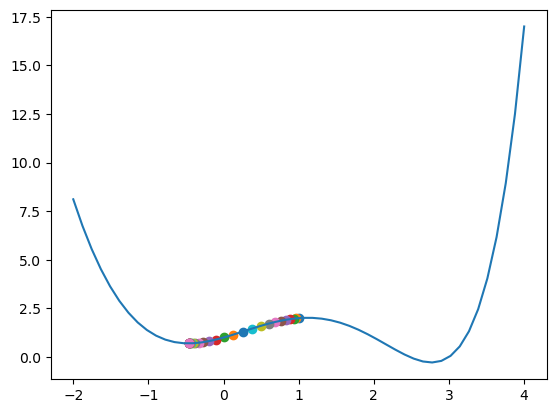

In [47]:
functie = lambda x: 3**x - x**3
afgeleide = lambda x: 3**x * np.log(3) - 3*x**2

x = np.linspace(-2, 4)
ai = gradient_descent(afgeleide, 1, 0.1, 100)

plt.plot(x, functie(x))
for a in ai:
    plt.scatter(a, functie(a))
plt.show()

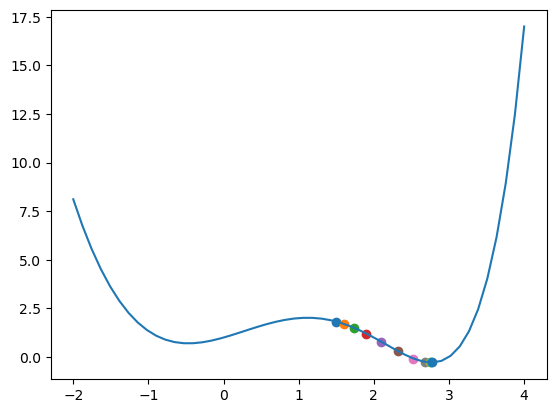

In [48]:
functie = lambda x: 3**x - x**3
afgeleide = lambda x: 3**x * np.log(3) - 3*x**2

x = np.linspace(-2, 4)
ai = gradient_descent(afgeleide, 1.5, 0.1, 100)

plt.plot(x, functie(x))
for a in ai:
    plt.scatter(a, functie(a))
plt.show()